In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from uncertainties import ufloat
from uncertainties import unumpy
Data="Torque_mag_Data_org.xlsx"

In [3]:
Data_arm=pd.read_excel(Data,sheet_name=0)
Data_arm

,I(A),tiempo(s),Oscilaciones,periodo(s)
0,1.00,36.35,20,1.8175
1,1.05,36.06,20,1.8030
2,1.10,35.25,20,1.7625
3,1.15,34.47,20,1.7235
4,1.20,33.25,20,1.6625
5,1.25,32.69,20,1.6345
6,1.30,31.91,20,1.5955
7,1.35,30.79,20,1.5395
8,1.40,30.10,20,1.5050
9,1.45,29.56,20,1.4780


In [4]:
def Get_B(I):
    return 1.36* 10**(-3) * I

T2_arm=Data_arm["periodo(s)"]**2

B_arm=Get_B(Data_arm["I(A)"])

Slope: 0.005328828601369631 ± 0.00020798190325617332
Intercept: -0.5035475322882375 ± 0.12538686251274417
Residuals: 0    -0.111403
1     0.022684
2     0.047903
3     0.066820
4     0.002240
5     0.040533
6     0.035124
7    -0.028804
8    -0.030182
9    -0.014214
10   -0.030701
dtype: float64


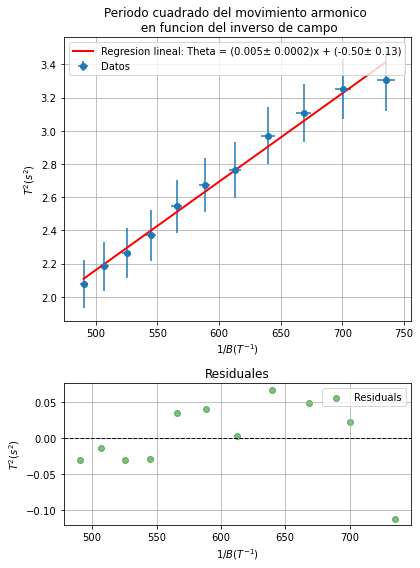

In [39]:
def linear_function(X, a, b):
    return a * X + b

y= T2_arm
x= 1/B_arm
yerr = 2*np.sqrt(T2_arm)*0.05
xerr = 1/B_arm**2  * 1.36* 10**(-3)*0.01

# Perform the curve fitting
popt, pcov = curve_fit(linear_function, x,y)

# Get the slope and intercept
slope = popt[0]
intercept = popt[1]

# Get the standard errors for the parameters
slope_std_err = np.sqrt(pcov[0, 0])
intercept_std_err = np.sqrt(pcov[1, 1])

## Setting variables


# Predict the Y values
Y_pred = linear_function(x, *popt)

# Calculate residuals
residuals = y - Y_pred

print(f"Slope: {slope} ± {slope_std_err}")
print(f"Intercept: {intercept} ± {intercept_std_err}")
print(f"Residuals: {residuals}")


# Create a figure with two subplots
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(6,8),gridspec_kw={'height_ratios': [2, 1]})  # 2 rows, 1 column, width = 10 inches, height = 10 inches

# Plot the regression line
ax1.errorbar(x, y, yerr, xerr,  fmt='o', label='Datos')
ax1.plot(x, Y_pred, color='red', linewidth=2, label=f'Regresion lineal: Theta = ({slope:.3f}± {slope_std_err:.4f})x + ({intercept:.2f}± {intercept_std_err:.2f})')

ax1.set_xlabel(r'$1/B (T^{-1})$')
ax1.set_ylabel(r'$T^2(s^2)$')
ax1.legend(loc='upper left')
ax1.set_title('Periodo cuadrado del movimiento armonico \n en funcion del inverso de campo')
#Plot residuals
ax2.scatter(x, residuals, color='green', alpha=0.5, label='Residuals')
ax2.axhline(0, color='black', linewidth=1, linestyle='--')
ax2.set_xlabel(r'$1/B (T^{-1})$')
ax2.set_ylabel(r'$T^2(s^2)$')
ax2.legend(loc='upper right')
ax2.set_title('Residuales')


ax1.grid()
ax2.grid()
plt.tight_layout()

# Save the figure as a PDF file
plt.savefig('Armonico.jpeg', format='jpeg')
plt.savefig('Armonico.pdf', format='pdf')
plt.show()

In [28]:
Data_p=pd.read_excel(Data,sheet_name=1)
Data_p

,I(A),T(s)
0,0.5,19.37
1,1.0,11.45
2,1.5,7.61
3,2.0,5.71
4,2.5,4.49
5,3.0,4.02
6,3.5,3.59


Slope: 361.32505476820285 ± 13.651060711082112
Intercept: 0.09029637031041989 ± 0.04151359047674894
Residuals: 0   -0.011620
1   -0.032949
2   -0.001751
3    0.027282
4    0.080572
5   -0.001521
6   -0.060013
dtype: float64


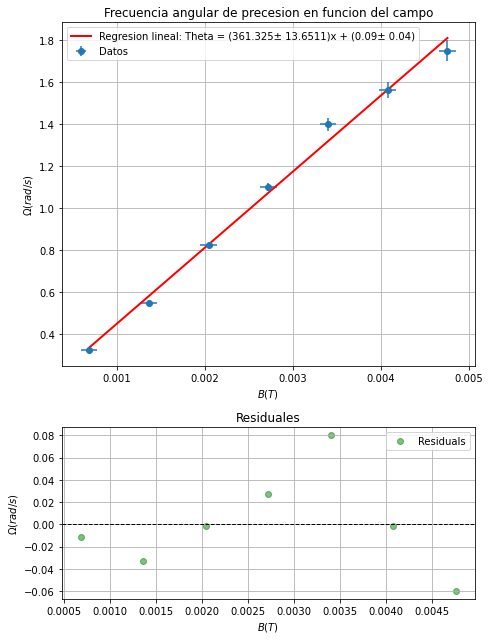

In [38]:
T_p=Data_p["T(s)"]

B_P=Get_B(Data_p["I(A)"])


y= 2*np.pi /T_p
x= B_P
yerr = 2*np.pi/T_p**2  *(0.1)
xerr = len(x)* 1.36* 10**(-3)*0.01

# Perform the curve fitting
popt, pcov = curve_fit(linear_function, x,y)

# Get the slope and intercept
slope = popt[0]
intercept = popt[1]

# Get the standard errors for the parameters
slope_std_err = np.sqrt(pcov[0, 0])
intercept_std_err = np.sqrt(pcov[1, 1])

## Setting variables


# Predict the Y values
Y_pred = linear_function(x, *popt)

# Calculate residuals
residuals = y - Y_pred

print(f"Slope: {slope} ± {slope_std_err}")
print(f"Intercept: {intercept} ± {intercept_std_err}")
print(f"Residuals: {residuals}")


# Create a figure with two subplots
fig1, (ax2,ax3) = plt.subplots(2,1,figsize=(7,9),gridspec_kw={'height_ratios': [2, 1]})  # 2 rows, 1 column, width = 10 inches, height = 10 inches

# Plot the regression line
ax2.errorbar(x, y, yerr, xerr,  fmt='o', label='Datos')
ax2.plot(x, Y_pred, color='red', linewidth=2, label=f'Regresion lineal: Theta = ({slope:.3f}± {slope_std_err:.4f})x + ({intercept:.2f}± {intercept_std_err:.2f})')

ax2.set_xlabel(r'$B (T)$')
ax2.set_ylabel(r'$\Omega(rad/s)$')
ax2.legend(loc='upper left')
ax2.set_title('Frecuencia angular de precesion en funcion del campo')
#Plot residuals
ax3.scatter(x, residuals, color='green', alpha=0.5, label='Residuals')
ax3.axhline(0, color='black', linewidth=1, linestyle='--')
ax3.set_xlabel(r'$B (T)$')
ax3.set_ylabel(r'$\Omega(rad/s)$')
ax3.legend(loc='upper right')
ax3.set_title('Residuales')


ax2.grid()
ax3.grid()
plt.tight_layout()

# Save the figure as a PDF file
plt.savefig('Precesion.jpeg', format='jpeg')
plt.savefig('Precesion.pdf', format='pdf')
plt.show()